In [ ]:
 !pip install fuzzy-c-means
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from fcmeans import FCM
from sklearn.svm import SVC
from sklearn.utils import shuffle
import statsmodels.api as sm 
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing required modules
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

***Read data*** 


In [ ]:
data=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

***describe data***

In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


***check the null values***

In [ ]:
data.isnull(). values. any()

False

In [ ]:
data=data.drop(["platelets" , "creatinine_phosphokinase"],axis=1)

In [ ]:
data.shape

(299, 11)

In [ ]:
# def find_outliers_IQR(df):

#     q1=df.quantile(0.25)

#     q3=df.quantile(0.75)

#     IQR=q3-q1

#     outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

#     return outliers

In [ ]:
# for i in data.columns:
#     outliers = find_outliers_IQR(data[i])
#     print(f'outliers of coulmn {i}')
#     print()
#     print("number of outliers:" + str(len(outliers)))
#     print("max outlier value: "+ str(outliers.max()))
#     print("min outlier value: " + str(outliers.min()))
#     print('')
#     print('-------------------------------------------')

In [ ]:
# def find_outliers_Index(df,col):

#     q1=df[col].quantile(0.25)

#     q3=df[col].quantile(0.75)

#     IQR=q3-q1

#     outliers = df.index[((df[col]<(q1-1.5*IQR)) | (df[col]>(q3+1.5*IQR)))]

#     return outliers

In [ ]:
# index_=[]
# for col in data.columns:
#     index_.extend(find_outliers_Index(data,col))
# index_

In [ ]:
# def remove_outliers(df,lst):
#     lst=sorted(set(lst))
#     df=df.drop(lst)
#     return df

In [ ]:
# data=remove_outliers(data,index_)
# data

***split the cont and bin features***

In [ ]:
discrete_features, continuous_features = [], []
for feature in data.columns:
    if feature == 'DEATH_EVENT':
        label = feature
    elif len(data[feature].unique()) > 2:
        continuous_features.append(feature)
    else:
        discrete_features.append(feature)

print('Discrete: ', discrete_features, '\n', 'Continuous:', continuous_features, '\n', 'Label:', label)

Discrete:  ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'] 
 Continuous: ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time'] 
 Label: DEATH_EVENT


In [ ]:
data[discrete_features].head()

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


In [ ]:
data[continuous_features].head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time
0,75.0,20,1.9,130,4
1,55.0,38,1.1,136,6
2,65.0,20,1.3,129,7
3,50.0,20,1.9,137,7
4,65.0,20,2.7,116,8


***scaling cont features***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data[continuous_features])
scaled_continuous_features = scaler.transform(data[continuous_features])
scaled_continuous_features = pd.DataFrame(data=scaled_continuous_features, columns=['age', 'ejection_fraction', 'serum_sodium','serum_sodium' ,'time' ])
scaled_continuous_features.head()

,age,ejection_fraction,serum_sodium,serum_sodium,time
0,0.636364,0.090909,0.157303,0.485714,0.000000
1,0.272727,0.363636,0.067416,0.657143,0.007117
2,0.454545,0.090909,0.089888,0.457143,0.010676
3,0.181818,0.090909,0.157303,0.685714,0.010676
4,0.454545,0.090909,0.247191,0.085714,0.014235


***concatenate all fature***

In [ ]:
scaled_data = pd.concat([data[discrete_features], scaled_continuous_features, data['DEATH_EVENT']], axis=1)
scaled_data.describe()

,anaemia,diabetes,high_blood_pressure,sex,smoking,age,ejection_fraction,serum_sodium,serum_sodium,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000
mean,0.431438,0.418060,0.351171,0.648829,0.32107,0.378798,0.364903,0.100436,0.675012,0.449327,0.32107
std,0.496107,0.494067,0.478136,0.478136,0.46767,0.216269,0.179316,0.116237,0.126071,0.276207,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.200000,0.242424,0.044944,0.600000,0.245552,0.00000
50%,0.000000,0.000000,0.000000,1.000000,0.00000,0.363636,0.363636,0.067416,0.685714,0.395018,0.00000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,0.545455,0.469697,0.101124,0.771429,0.708185,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
scaled_data

,anaemia,diabetes,high_blood_pressure,sex,smoking,age,ejection_fraction,serum_sodium,serum_sodium,time,DEATH_EVENT
0,0,0,1,1,0,0.636364,0.090909,0.157303,0.485714,0.000000,1
1,0,0,0,1,0,0.272727,0.363636,0.067416,0.657143,0.007117,1
2,0,0,0,1,1,0.454545,0.090909,0.089888,0.457143,0.010676,1
3,1,0,0,1,0,0.181818,0.090909,0.157303,0.685714,0.010676,1
4,1,1,0,0,0,0.454545,0.090909,0.247191,0.085714,0.014235,1
...,...,...,...,...,...,...,...,...,...,...,...
294,0,1,1,1,1,0.400000,0.363636,0.067416,0.857143,0.946619,0
295,0,0,0,0,0,0.272727,0.363636,0.078652,0.742857,0.950178,0
296,0,1,0,0,0,0.090909,0.696970,0.033708,0.714286,0.975089,0
297,0,0,0,1,1,0.090909,0.363636,0.101124,0.771429,0.982206,0


In [ ]:
scaled_data.isnull(). values. any()

False

***split data to target and features***

In [ ]:
y=scaled_data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [ ]:
x=scaled_data.iloc[:,:12]
x

,anaemia,diabetes,high_blood_pressure,sex,smoking,age,ejection_fraction,serum_sodium,serum_sodium,time,DEATH_EVENT
0,0,0,1,1,0,0.636364,0.090909,0.157303,0.485714,0.000000,1
1,0,0,0,1,0,0.272727,0.363636,0.067416,0.657143,0.007117,1
2,0,0,0,1,1,0.454545,0.090909,0.089888,0.457143,0.010676,1
3,1,0,0,1,0,0.181818,0.090909,0.157303,0.685714,0.010676,1
4,1,1,0,0,0,0.454545,0.090909,0.247191,0.085714,0.014235,1
...,...,...,...,...,...,...,...,...,...,...,...
294,0,1,1,1,1,0.400000,0.363636,0.067416,0.857143,0.946619,0
295,0,0,0,0,0,0.272727,0.363636,0.078652,0.742857,0.950178,0
296,0,1,0,0,0,0.090909,0.696970,0.033708,0.714286,0.975089,0
297,0,0,0,1,1,0.090909,0.363636,0.101124,0.771429,0.982206,0


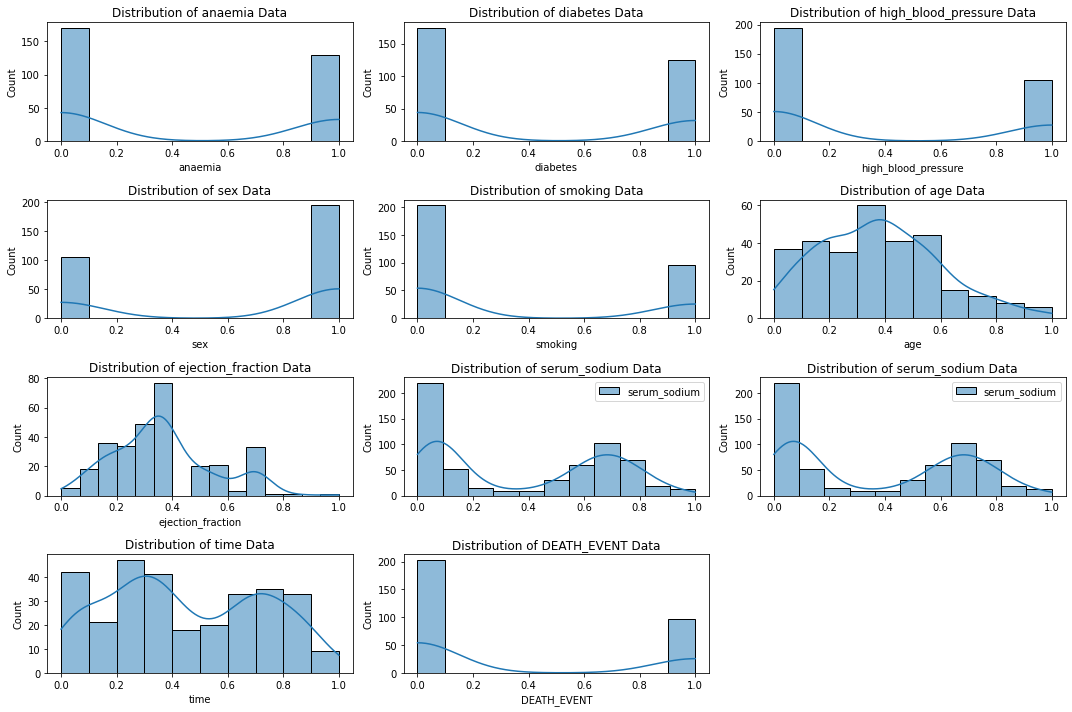

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i,col in enumerate(x.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(x[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [ ]:
pca = PCA(2)
df = pca.fit_transform(x)
df.shape

(299, 2)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split( x, y, test_size=0.2)

***apply elbow method to get the best num of clusters***

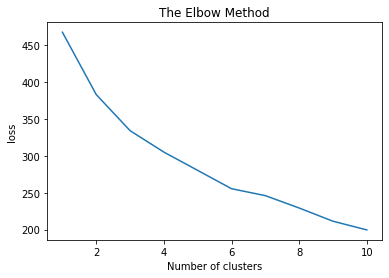

In [ ]:
import matplotlib.pyplot as plt
loss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    loss.append(kmeans.inertia_)
plt.plot(range(1, 11), loss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('loss')
plt.show()

***train the model***

In [ ]:
#kmeans = KMeans(n_clusters=2,random_state=45)

#kmeans.fit(x)

# check how many of the samples were correctly labeled
#labels = kmeans.labels_



In [ ]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)
correct_labels = sum(y == label)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
k_acc=correct_labels/float(y.size)*100
k_acc

[0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1
 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0
 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0
 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1
 1 0 0]
Result: 144 out of 299 samples were correctly labeled.


48.16053511705686

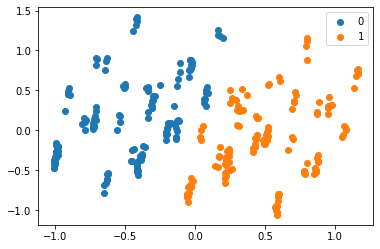

In [ ]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

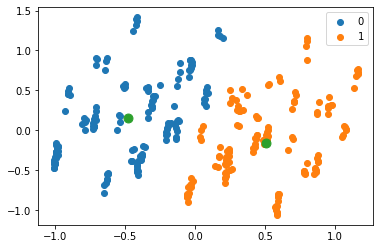

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80)
plt.legend()
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[-0.47993832,  0.15257963],
       [ 0.5097276 , -0.16205009]])

In [ ]:
import pandas as pd
label=pd.DataFrame(label)
label.columns=["labels"]
label.value_counts()

labels
0         154
1         145
dtype: int64

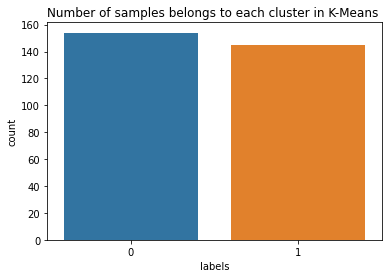

In [ ]:
import seaborn as sns 
sns.countplot(data=label,x="labels").set(title='Number of samples belongs to each cluster in K-Means ')
plt.show()

***Apply fuzzy c mean clustring***

In [ ]:
import numpy as np
m = FCM(n_clusters=2,m=1.7,maxiter=100,random_state=45)
xm=np.array(x)
m.fit(xm)
y_pred=m.soft_predict(xm)
y_pred
# check how many of the samples were correctly labeled


array([[0.47697726, 0.52302274],
       [0.42428198, 0.57571802],
       [0.33944104, 0.66055896],
       [0.4918705 , 0.5081295 ],
       [0.63234575, 0.36765425],
       [0.44379457, 0.55620543],
       [0.49116988, 0.50883012],
       [0.4662128 , 0.5337872 ],
       [0.55595655, 0.44404345],
       [0.45526246, 0.54473754],
       [0.44082398, 0.55917602],
       [0.38666988, 0.61333012],
       [0.49255212, 0.50744788],
       [0.53022839, 0.46977161],
       [0.63017458, 0.36982542],
       [0.49406887, 0.50593113],
       [0.4930135 , 0.5069865 ],
       [0.43356788, 0.56643212],
       [0.61912463, 0.38087537],
       [0.64286359, 0.35713641],
       [0.63161453, 0.36838547],
       [0.66979793, 0.33020207],
       [0.43548012, 0.56451988],
       [0.50004834, 0.49995166],
       [0.63322653, 0.36677347],
       [0.41422219, 0.58577781],
       [0.60617498, 0.39382502],
       [0.45155757, 0.54844243],
       [0.49371563, 0.50628437],
       [0.41376335, 0.58623665],
       [0.

In [ ]:
"""def alpcut1(alpha,y_fuzzy):
  for i in range(1):
    for m in y_fuzzy:
      if y_fuzzy[m][i]>alpha:
        y_fuzzy[m][i]==1 and y_fuzzy[m][i]==0
      else:
        y_fuzzy[m][i]==1 and y_fuzzy[m][i]==0
      return(np.argmax(y_fuzzy[i]))"""

'def alpcut1(alpha,y_fuzzy):\n  for i in range(1):\n    for m in y_fuzzy:\n      if y_fuzzy[m][i]>alpha:\n        y_fuzzy[m][i]==1 and y_fuzzy[m][i]==0\n      else:\n        y_fuzzy[m][i]==1 and y_fuzzy[m][i]==0\n      return(np.argmax(y_fuzzy[i]))'

***calculate alpha cut to get crisp values(labels)***

In [ ]:
def alph_cut(alpha,y_fuzzy):
  #alpha=.4
  labels=[]
  count=len(y_fuzzy)
  for i in range(count):
    if (alpha<=y_fuzzy[i][0]):
      labels.append(0)
    else:
      labels.append(1)
  return labels

In [ ]:
y_pred[1][0]

0.4242819760151961

In [ ]:
alph_cut(0.5,y_pred)

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,


***alpha cut =0.2***

In [ ]:
labels = alph_cut(0.2,y_pred)
#label=np.array(labels)
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
c_acc= correct_labels/float(y.size)*100
c_acc

Result: 203 out of 299 samples were correctly labeled.


67.89297658862876

***alpha cut =0.3***

In [ ]:
labels = alph_cut(0.3,y_pred)
#label=np.array(labels)
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
c_acc= correct_labels/float(y.size)*100
c_acc

Result: 177 out of 299 samples were correctly labeled.


59.19732441471572

***alpha cut =0.4***

In [ ]:
labels = alph_cut(0.4,y_pred)
#label=np.array(labels)
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
c_acc= correct_labels/float(y.size)*100
c_acc

Result: 152 out of 299 samples were correctly labeled.


50.836120401337794

***alpha cut =0.7***

In [ ]:
labels = alph_cut(0.7,y_pred)
#label=np.array(labels)
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
c_acc= correct_labels/float(y.size)*100
c_acc

Result: 98 out of 299 samples were correctly labeled.


32.77591973244147

***alpha cut =0.8***

In [ ]:
labels = alph_cut(0.8,y_pred)
#label=np.array(labels)
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
c_acc= correct_labels/float(y.size)*100
c_acc

Result: 96 out of 299 samples were correctly labeled.


32.10702341137124

***alpha cut=0.1***

In [ ]:
labels = alph_cut(0.1,y_pred)
#label=np.array(labels)
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
c_acc= correct_labels/float(y.size)*100
c_acc
l=alph_cut(0.4,y_pred)
l=pd.DataFrame(l)
l
l.columns=["l"]
c_acc= correct_labels/float(y.size)*100
c_acc


Result: 203 out of 299 samples were correctly labeled.


67.89297658862876

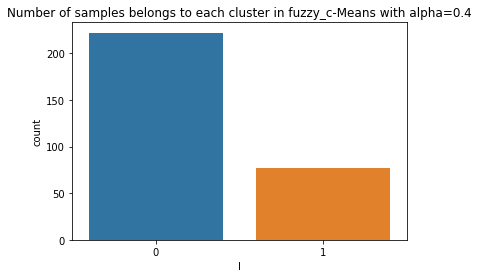

In [ ]:
l.value_counts()
import seaborn as sns 
sns.countplot(data=l,x="l").set(title='Number of samples belongs to each cluster in fuzzy_c-Means with alpha=0.4')
plt.show()

In [ ]:
# Instantiate the Support Vector Classifier (SVC)
from sklearn.metrics import confusion_matrix
svc = SVC(C=1.0, random_state=45, kernel='linear') 

# Fit the model
svc.fit(x_train, y_train)

# Make the predictions
y_predict = svc.predict(x_test)

# Measure the performance
SVM_accuracy=accuracy_score(y_test, y_predict)*100
print("Accuracy score : ",SVM_accuracy)
f=confusion_matrix(y_test,y_predict)
f

Accuracy score :  100.0


array([[36,  0],
       [ 0, 24]])

In [ ]:
Models=["Fuzzy C-Means","K-Means","SVM"]
model_data = [c_acc  , k_acc, SVM_accuracy]
cols = ["Accuracy_score"]
compare=pd.DataFrame(data=model_data , index= Models , columns= cols)
compare.sort_values(ascending= False , by = ['Accuracy_score'])

,Accuracy_score
SVM,100.000000
Fuzzy C-Means,67.892977
K-Means,48.160535


In [ ]:
# def compute_cost(W, X, Y):
#     # calculate hinge loss
#     N = X.shape[0]
#     distances = 1 - Y * (np.dot(X, W))
#     distances[distances < 0] = 0  # equivalent to max(0, distance)
#     hinge_loss = reg_strength * (np.sum(distances) / N)
    
#     # calculate cost
#     cost = 1 / 2 * np.dot(W, W) + hinge_loss
#     return cost

In [ ]:
# def calculate_cost_gradient(W, X_batch, Y_batch):
#     # if only one example is passed (eg. in case of SGD)
#     if type(Y_batch) == np.float64:
#         Y_batch = np.array([Y_batch])
#         X_batch = np.array([X_batch])
#     distance = 1 - (Y_batch * np.dot(X_batch, W))
#     dw = np.zeros(len(W))
#     for ind, d in enumerate(distance):
#         if max(0, d) == 0:
#             di = W
#         else:
#             di = W - (reg_strength * Y_batch[ind] * X_batch[ind])
#         dw += di

In [ ]:
def sgd(features, outputs):
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    # stochastic gradient descent
    for epoch in range(1, max_epochs): 
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)
            
    return weights

In [ ]:
# # train the model
# print("training started...")
# W = sgd(x_train.to_numpy(), y_train.to_numpy())
# print("training finished.")
# print("weights are: {}".format(W))

In [ ]:
# def sgd(features, outputs):
#     max_epochs = 5000
#     weights = np.zeros(features.shape[1])
#     nth = 0
#     prev_cost = float("inf")
#     cost_threshold = 0.01  # in percent
#     # stochastic gradient descent
#     for epoch in range(1, max_epochs):
#         # shuffle to prevent repeating update cycles
#         X, Y = shuffle(features, outputs)
#         for ind, x in enumerate(X):
#             ascent = calculate_cost_gradient(weights, x, Y[ind])
#             weights = weights - (learning_rate * ascent)
#         # convergence check on 2^nth epoch
#         if epoch == 2 ** nth or epoch == max_epochs - 1:
#             cost = compute_cost(weights, features, outputs)
#             print("Epoch is:{} and Cost is: {}".format(epoch, cost))
#             # stoppage criterion
#             if abs(prev_cost - cost) < cost_threshold * prev_cost:
#                 return weights
#             prev_cost = cost
#             nth += 1
#     return weights

In [ ]:
# # testing the model on test set
# y_test_predicted = np.array([])
# for i in range(x_test.shape[0]):
#     yp = np.sign(np.dot(W, x_test.to_numpy()[i])) #model
#     y_test_predicted = np.append(y_test_predicted, yp)
# print("accuracy on test dataset: {}".format(accuracy_score(y_test.to_numpy(), y_test_predicted)))
# print("recall on test dataset: {}".format(recall_score(y_test.to_numpy(), y_test_predicted)))
# print("precision on test dataset: {}".format(recall_score(y_test.to_numpy(), y_test_predicted)))

In [ ]:
class SVM:
    def __init__(self, iterations=1000, lr=0.01, lambdaa=0.01):
        self.lambdaa = lambdaa
        self.iterations = iterations
        self.lr = lr
        self.w = None
        self.b = None
        

    def initialize_parameters(self,X):
        #get number of examples and number of features
        m, n = X.shape
        #initialize w to array of zeros of the shape of number of features
        # Note intializing w to random array will sometimes yield better/worse results
        self.w = np.zeros(n)
        #intialize b to zero
        self.b = 0

        
    def gradient_descent(self, X, y):
        # set y to -1 if it's equal or less than 0, else set it to 1
        y_ = np.where(y <= 0, -1, 1)
        # loop over the indexes and elements in X
        for i, x in enumerate(X):
            #Check if the condition mentioned above is true and set dw, db accordingly
            if y_[i] * (np.dot(x, self.w) - self.b) >= 1:
                dw = 2 * self.lambdaa * self.w
                db = 0
            else:
                dw = 2 * self.lambdaa * self.w - np.dot(x, y_[i])
                db = y_[i]
                #update the weights using update weight function
            self.update_parameters(dw,db)

        
    def update_parameters(self, dw, db):
        
        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db

        
    def fitting(self, X, y):
        #intialize parameters
        self.initialize_parameters(X)
        #loop for specified number of iterations
        for i in range(self.iterations):
            #get the gradients and update weights
            self.gradient_descent(X,y)
            
            
    def predicted(self, X):
        # get the outputs
        output = np.dot(X, self.w) - self.b
        # get the signs of the labels depending on if it's greater/less than zero
        label_signs = np.sign(output)
        #set predictions to 0 if they are less than or equal to -1 else set them to 1
        predictions = np.where(label_signs <= -1, 0, 1)
        return predictions

In [ ]:
model = SVM()
n12 = np.squeeze(np.asarray(x_train))
n = np.squeeze(np.asarray(y_train))
model.fitting(n12,n)
predictions = model.predicted(x_test)

svm_acc = accuracy_score(y_test, predictions)
print('Accuracy:',svm_acc*100)

Accuracy: 100.0


In [ ]:
from sklearn.svm import SVC
skmodel = SVC()
skmodel.fit(x_train, y_train)
sk_predictions = skmodel.predict(x_test)

accuracy_score(y_test, sk_predictions)*100

100.0

In [ ]:
import numpy as np
import cvxopt
from scipy.spatial import distance

# Pilihan Fungsi Kernel
def linear(x,z):
    return np.dot(x,z.T)

def polynomial(x, z, p=5):
    return (1 + np.dot(x, z.T)) ** p


def gaussian(x, z, sigma=0.1):
    return np.exp(-np.linalg.norm(x - z, axis=1) ** 2 / (2 * (sigma ** 2)))

# Pilihan Fungsi Jarak
def euclidean(x,y):
    return np.sqrt(sum(pow(a-b, 2) for a, b in zip(x,y)))

def akar_ke_n(nilai, akar_n):
    nilai_akar=1/float(akar_n)
    return round(float(nilai)**float(nilai_akar),3)

def minkowski(x,y,p_value):
    return akar_ke_n(sum(pow(abs(a-b), p_value) for a, b in zip(x,y)), p_value)

def chebisev(x,y):
    return max((a-b) for a,b in zip(x,y))

def minkowski_chebisev(w1,w2,x,y,p_value):
    return w1*minkowski(x,y,p_value)+w2*chebisev(x,y)

# Fuzzyfikasi

def pusat_kelas(X,y):
    x_neg=X[y==-1]
    x_pos=X[y==1]
    x_neg_center=np.mean(x_neg, axis=0)
    x_pos_center=np.mean(x_pos, axis=0)
    center=[]
    center.append(x_neg_center)
    center.append(x_pos_center)
    return center


class Fuzzy_SVM:
    def __init__(self, kernel=gaussian, jarak=euclidean, C=1, delta=1e-8):
        self.kernel = kernel
        self.jarak  = jarak
        self.C      = C
        self.delta  = delta
        
    def fit(self, X, y, w1=0.5, w2=0.5, p_value=1):
        self.y = y
        self.X = X
        m, n = X.shape

        # Number Kernel
        self.K = np.zeros((m, m))
        for i in range(m):
            self.K[i, :] = self.kernel(X[i, np.newaxis], self.X)
        
        # Number Pusat Kelas
        self.center = pusat_kelas(X,y)
        
        # Menghitung Radius
        # select sv from neg
        jarak_neg=[]
        X_neg=self.X[self.y==-1]
        for i in X_neg:
            jrk_n=float(self.jarak(i, self.center[0]))
            jarak_neg.append(jrk_n)
        self.r_neg = np.max(jarak_neg)
        # select sv from pos
        jarak_pos=[]
        X_pos=self.X[self.y==1]
        for i in X_pos:
            jrk_p=float(distance.euclidean(i, self.center[1]))
            jarak_pos.append(jrk_p)
        self.r_pos = np.max(jarak_pos)
        
        s_i=[]
        for i in range(m):
            y_i = y[i]
            if (y_i) == -1:
                X_i=X[i]
                jrk = float(self.jarak(X_i, self.center[0]))
                s = 1 - (jrk/(self.r_neg+self.delta))
                s_i.append(s)
            elif (y_i) == 1:
                X_i=X[i]
                jrk = float(self.jarak(X_i, self.center[1]))
                s = 1 - (jrk/(self.r_pos+self.delta))
                s_i.append(s)
        
        self.s_i=s_i

        # Solving Optimization Problems with CVXOPT

        P = cvxopt.matrix(np.outer(y, y) * self.K)
        q = cvxopt.matrix(-np.ones((m, 1)))
        G = cvxopt.matrix(np.vstack((np.eye(m) * -1, np.eye(m))))
        h = cvxopt.matrix(np.hstack((np.zeros(m), self.s_i * self.C)))
        A = cvxopt.matrix(y, (1, m), "d")
        b = cvxopt.matrix(np.zeros(1))
        cvxopt.solvers.options["show_progress"] = False
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        self.alphas = np.array(sol["x"])
        

    def get_parameters(self, alphas):
        threshold = 1e-5

        sv = ((alphas > threshold) * (alphas < self.C)).flatten()
        w = np.dot(X[sv].T, alphas[sv] * self.y[sv, np.newaxis])
        self.w = w[::]
        self.b = np.mean(
            self.y[sv, np.newaxis]
            - self.alphas[sv] * self.y[sv, np.newaxis] * self.K[sv, sv][:, np.newaxis]
        )
        
        self.supportVectors = self.X[sv]
        return sv
    
    
    def predict(self, X):
        y_predict = np.zeros((X.shape[0]))
        sv = self.get_parameters(self.alphas)

        for i in range(X.shape[0]):
            y_predict[i] = np.sum(
                self.alphas[sv]
                * self.y[sv, np.newaxis]
                * self.kernel(X[i], self.X[sv])[:, np.newaxis]
            )
        return np.sign(y_predict + self.b)
  

def generateBatchBipolar(n, mu=0.5, sigma=0.2):
    """ Two gaussian clouds on each side of the origin """
    X = np.random.normal(mu, sigma, (n, 2))
    yB = np.random.uniform(0, 1, n) > 0.5
    # y is in {-1, 1}
    y = 2. * yB - 1
    X *= y[:, np.newaxis]
    X -= X.mean(axis=0)
    return X, y

if __name__ == "__main__":
    np.random.seed(1)
    
    X, y = generateBatchBipolar(100, mu=0.3, sigma=0.3)
    svm = Fuzzy_SVM(kernel=linear, jarak=chebisev)
    svm.fit(X, y, p_value=1)
    y_pred = svm.predict(X)
    

    print(f"Accuracy: {sum(y==y_pred)/y.shape[0]}")

Accuracy: 0.92
